In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
conda list

# packages in environment at I:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
alabaster                 0.7.12                   py37_0  
anaconda                  2019.10                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.7                    py37_0  
anaconda-project          0.8.3                      py_0  
asn1crypto                1.0.1                    py37_0  
astroid                   2.3.1                    py37_0  
astropy                   3.2.1            py37he774522_0  
atomicwrites              1.3.0                    py37_1  
attrs                     19.2.0                     py_0  
babel                     2.7.0                      py_0  
backcall                  0.1.0                    py37_0  
backports                 1.0                        py_2  
backports.functools_lru_cache 1.5   

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
grocery_df=pd.read_csv('./grocery_df.csv',header=0)

In [6]:
grocery_df.shape

(2541019, 25)

In [7]:
grocery_df.head()

,trans_id,time_id,quantity,spend,prod_id,cust_id,basket_id,store_id,shop_week,date_from,date_to,shop_date,shop_hour,prod_code_10,prod_code_20,prod_code_30,prod_code_40,cust_price_sensitivity,cust_lifestage,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
0,1,0,1,0.93,PRD0900033,CUST0000410727,994100100398294,STORE00001,200607,20060410,20060416,20060415,19,CL00201,DEP00067,G00021,D00005,UM,OT,L,MM,Full Shop,Mixed,LS,E02
1,4,0,1,3.07,PRD0900135,CUST0000410727,994100100398294,STORE00001,200607,20060410,20060416,20060415,19,CL00201,DEP00067,G00021,D00005,UM,OT,L,MM,Full Shop,Mixed,LS,E02
2,5,0,1,4.81,PRD0900220,CUST0000410727,994100100398294,STORE00001,200607,20060410,20060416,20060415,19,CL00051,DEP00013,G00005,D00002,UM,OT,L,MM,Full Shop,Mixed,LS,E02
3,10,0,1,1.62,PRD0900709,CUST0000410727,994100100398294,STORE00001,200607,20060410,20060416,20060415,19,CL00205,DEP00069,G00022,D00005,UM,OT,L,MM,Full Shop,Mixed,LS,E02
4,11,0,1,1.85,PRD0900713,CUST0000410727,994100100398294,STORE00001,200607,20060410,20060416,20060415,19,CL00165,DEP00055,G00016,D00003,UM,OT,L,MM,Full Shop,Mixed,LS,E02


In [151]:
cust_level_df=grocery_df.groupby(['cust_id','basket_id']).agg({'spend':'mean'
                                                               ,'prod_id':'nunique',
                                                              'prod_code_40':'nunique',
                                                              'prod_code_30':'nunique',
                                                              'prod_code_20':'nunique',
                                                              'prod_code_10':'nunique'}).groupby(level=0).agg({'spend':'sum',
                                                                                                              'prod_id':'mean',
                                                                                                              'prod_code_40':'mean',
                                                                                                              'prod_code_30':'mean',
                                                                                                              'prod_code_20':'mean',
                                                                                                              'prod_code_10':'mean'})
cust_level_df

,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10
cust_id,,,,,,
CUST0000000013,20.445778,7.750000,2.500000,4.333333,6.250000,7.000000
CUST0000000055,78.369838,4.666667,2.133333,2.733333,3.600000,3.733333
CUST0000000679,21.352000,4.000000,2.142857,2.642857,3.142857,3.571429
CUST0000001052,90.945833,2.645161,1.870968,2.225806,2.354839,2.483871
CUST0000001058,3.972222,18.000000,4.000000,8.000000,13.000000,14.000000
...,...,...,...,...,...,...
CUST0000998609,29.262500,1.500000,1.285714,1.500000,1.500000,1.500000
CUST0000998851,100.551149,6.652174,2.217391,3.782609,4.956522,5.869565
CUST0000998907,295.133426,13.265537,3.050847,6.615819,9.209040,11.355932


In [30]:
grocery_df.groupby('cust_id')[['store_id','shop_week','shop_date','shop_hour','basket_size','basket_price_sensitivity','basket_type'
                               ,'basket_dominant_mission','store_format','store_region']].nunique()

,store_id,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
cust_id,,,,,,,,,,
CUST0000000013,2,12,12,6,3,2,3,2,2,2
CUST0000000055,1,15,15,6,3,3,2,4,1,1
CUST0000000679,3,12,14,5,3,3,2,4,2,3
CUST0000001052,3,28,31,7,3,3,2,3,3,2
CUST0000001058,1,2,2,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
CUST0000998609,5,13,14,8,2,2,2,4,3,5
CUST0000998851,4,16,20,10,3,4,3,4,2,3
CUST0000998907,2,105,166,14,3,3,3,4,1,2


In [26]:
grocery_df.groupby(['cust_id','basket_id']).agg({'spend':'mean','prod_code_40':'nunique'})

spend  prod_code_40
cust_id        basket_id                              
CUST0000000013 994105500169368  1.938750             2
               994105900171284  2.210000             1
               994106000168294  1.475455             3
               994106600174081  0.115000             1
               994106700173720  1.553000             3
...                                  ...           ...
CUST0000999786 994111100817749  0.907500             2
               994111200818180  0.980000             1
               994111300819473  1.343333             2
               994111300819474  0.945000             2
               994111700818612  1.660000             1

[390320 rows x 2 columns]

In [12]:
grocery_df.groupby(['cust_id','basket_id']).agg({'spend':'sum','prod_id':'count'}).reset_index().groupby('cust_id')

,basket_id,spend,prod_id
cust_id,,,
CUST0000000013,9.941077e+14,13.360000,7.750000
CUST0000000055,9.941081e+14,28.910000,4.666667
CUST0000000679,9.941054e+14,6.116429,4.000000
CUST0000001052,9.941058e+14,8.416774,2.645161
CUST0000001058,9.941107e+14,35.750000,18.000000
...,...,...,...
CUST0000998609,9.941053e+14,3.847143,1.500000
CUST0000998851,9.941085e+14,17.170435,6.652174
CUST0000998907,9.941063e+14,21.022712,13.265537


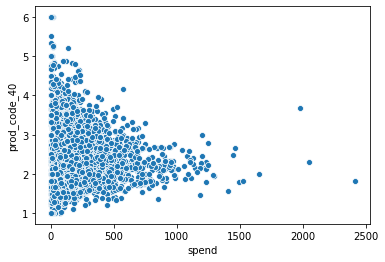

In [19]:
sns.scatterplot('spend','prod_code_40',data=cust_level_df)

In [21]:
#cust_df.to_csv('./customers.csv',index=False)

In [9]:
cust_df=pd.read_csv('./customers.csv',header=0)
cust_df.head()

,cust_id,cust_price_sensitivity,cust_lifestage
0,CUST0000000013,MM,YF
1,CUST0000000055,LA,YA
2,CUST0000000679,MM,OT
3,CUST0000001052,UM,PE
4,CUST0000001058,UM,OT


In [30]:
cust_level_df=cust_level_df.merge(cust_df,on='cust_id')
cust_level_df.head()

,cust_id,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,cust_price_sensitivity,cust_lifestage
0,CUST0000000013,20.445778,7.750000,2.500000,4.333333,6.250000,7.000000,MM,YF
1,CUST0000000055,78.369838,4.666667,2.133333,2.733333,3.600000,3.733333,LA,YA
2,CUST0000000679,21.352000,4.000000,2.142857,2.642857,3.142857,3.571429,MM,OT
3,CUST0000001052,90.945833,2.645161,1.870968,2.225806,2.354839,2.483871,UM,PE
4,CUST0000001058,3.972222,18.000000,4.000000,8.000000,13.000000,14.000000,UM,OT


In [31]:
cust_level_df['cust_lifestage'].fillna('XX',inplace=True)

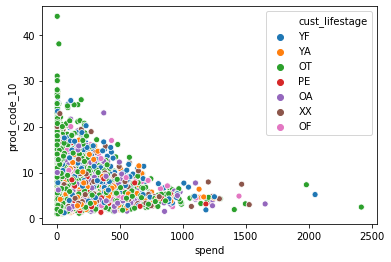

In [35]:
sns.scatterplot('spend','prod_code_10',data=cust_level_df,hue='cust_lifestage')

In [31]:
cust_level_df[cust_level_df['cust_price_sensitivity']=='XX']

,cust_id,spend,prod_id,cust_price_sensitivity,cust_lifestage
19,CUST0000003603,3.450000,2.75,XX,PE
34,CUST0000007540,14.170000,6.00,XX,OT
35,CUST0000007634,3.206667,3.00,XX,OA
37,CUST0000008112,2.760000,1.00,XX,OT
48,CUST0000009875,9.860000,5.00,XX,OT
...,...,...,...,...,...
4959,CUST0000992117,0.530000,1.00,XX,OT
4971,CUST0000993845,8.290000,1.00,XX,OT
4972,CUST0000994026,5.260000,3.00,XX,OT
4983,CUST0000995942,2.930000,3.00,XX,OT


In [36]:
cust_level_df.corr()

,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10
spend,1.000000,-0.057402,-0.037935,-0.051558,-0.053657,-0.053409
prod_id,-0.057402,1.000000,0.815580,0.937101,0.976769,0.992225
prod_code_40,-0.037935,0.815580,1.000000,0.906302,0.861361,0.832627
prod_code_30,-0.051558,0.937101,0.906302,1.000000,0.973694,0.952283
prod_code_20,-0.053657,0.976769,0.861361,0.973694,1.000000,0.987893
prod_code_10,-0.053409,0.992225,0.832627,0.952283,0.987893,1.000000


In [37]:
#Kmeans

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score

In [39]:
pipeline_1=Pipeline([('scaler',StandardScaler())])

In [41]:
cust_level_df_scaled=pipeline_1.fit_transform(cust_level_df)

([<matplotlib.axis.XTick at 0x22f60591348>,
 <a list of 10 Text xticklabel objects>)

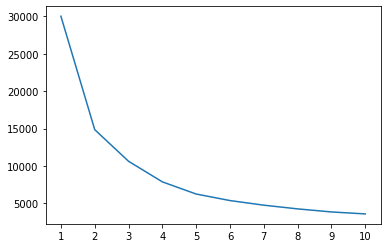

In [43]:
inertia_1=[]
for n in range(1,11):
    kmeans_model_1=KMeans(n_clusters=n)
    kmeans_model_1.fit(cust_level_df_scaled)
    inertia_1.append(kmeans_model_1.inertia_)
plt.plot(range(1,11),inertia_1)
plt.xticks(range(1,11))

([<matplotlib.axis.XTick at 0x22f6144f888>,
 <a list of 9 Text xticklabel objects>)

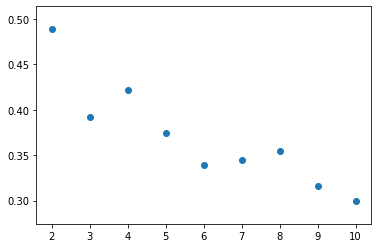

In [45]:
sil_1=[]
for n in range(2,11):
    kmeans_model_1=KMeans(n_clusters=n)
    kmeans_model_1.fit(cust_level_df_scaled)
    sil_1.append(silhouette_score(cust_level_df_scaled,kmeans_model_1.labels_,metric='euclidean'))
plt.scatter(range(2,11),sil_1)
plt.xticks(range(2,11))

In [46]:
#Therefore, we select n=2 as the number of clusters

In [47]:
kmeans_model_1=KMeans(n_clusters=2)
kmeans_model_1.fit(cust_level_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
np.unique(kmeans_model_1.labels_,return_counts=True)

(array([0, 1]), array([3625, 1375], dtype=int64))

In [50]:
pipeline_2=Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=2))])
cust_level_df_2d=pipeline_2.fit_transform(cust_level_df)

In [52]:
cust_level_df_2d

array([[ 0.39206124, -0.63742992],
       [-1.12287566, -0.39961247],
       [-1.26602178, -0.68063646],
       ...,
       [ 2.46702489,  0.76318234],
       [ 1.59017988,  1.20338958],
       [-1.5777796 ,  0.49509534]])

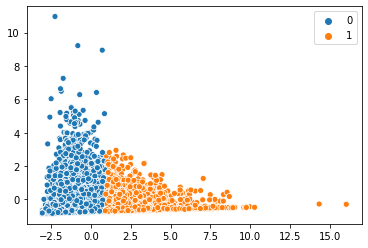

In [53]:
sns.scatterplot(cust_level_df_2d[:,0],cust_level_df_2d[:,1],hue=kmeans_model_1.labels_)

In [54]:
#With PCA preprocessing

In [55]:
pipeline_3=Pipeline([('scaler',StandardScaler()),('PCA',PCA())])
pipeline_3.fit(cust_level_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

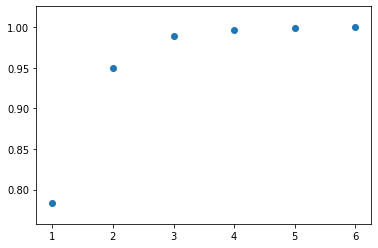

In [57]:
plt.scatter(range(1,7),np.cumsum(pipeline_3.named_steps['PCA'].explained_variance_ratio_))


In [11]:
pipeline_3=Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=2))])
cust_level_df_scaled_pca=pipeline_3.fit_transform(cust_level_df)

([<matplotlib.axis.XTick at 0x22f1ee77588>,
 <a list of 10 Text xticklabel objects>)

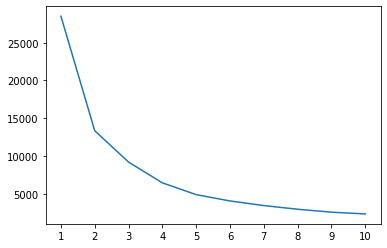

In [59]:
inertia_2=[]
for n in range(1,11):
    kmeans_model_2=KMeans(n_clusters=n)
    kmeans_model_2.fit(cust_level_df_scaled_pca)
    inertia_2.append(kmeans_model_2.inertia_)
plt.plot(range(1,11),inertia_2)
plt.xticks(range(1,11))

([<matplotlib.axis.XTick at 0x22f1eea0888>,
 <a list of 9 Text xticklabel objects>)

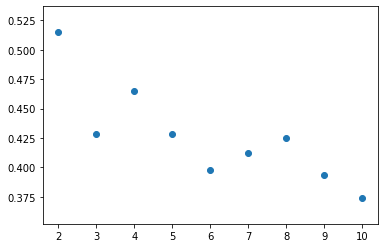

In [60]:
sil_2=[]
for n in range(2,11):
    kmeans_model_2=KMeans(n_clusters=n)
    kmeans_model_2.fit(cust_level_df_scaled_pca)
    sil_2.append(silhouette_score(cust_level_df_scaled_pca,kmeans_model_2.labels_,metric='euclidean'))
plt.scatter(range(2,11),sil_2)
plt.xticks(range(2,11))

In [12]:
kmeans_model_2=KMeans(n_clusters=2)
kmeans_model_2.fit(cust_level_df_scaled_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

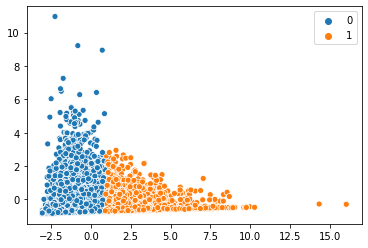

In [13]:
sns.scatterplot(cust_level_df_scaled_pca[:,0],cust_level_df_scaled_pca[:,1],hue=kmeans_model_2.labels_)

In [64]:
#Analysis on better results

In [14]:
cust_level_df_labeled=cust_level_df.copy()
cust_level_df_labeled['kmeans']=kmeans_model_2.labels_
cust_level_df_labeled.head()

,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,kmeans
cust_id,,,,,,,
CUST0000000013,20.445778,7.750000,2.500000,4.333333,6.250000,7.000000,0
CUST0000000055,78.369838,4.666667,2.133333,2.733333,3.600000,3.733333,0
CUST0000000679,21.352000,4.000000,2.142857,2.642857,3.142857,3.571429,0
CUST0000001052,90.945833,2.645161,1.870968,2.225806,2.354839,2.483871,0
CUST0000001058,3.972222,18.000000,4.000000,8.000000,13.000000,14.000000,1


In [16]:
cust_level_df_labeled.groupby('kmeans').describe()

spend                                                       \
         count        mean         std    min        25%        50%   
kmeans                                                                
0       3624.0  166.945170  223.408865  0.010  15.395125  80.782139   
1       1376.0  117.965485  140.307602  0.639   5.357901  58.759624   

                                prod_id                                      \
               75%          max   count       mean       std  min       25%   
kmeans                                                                        
0       237.130960  2416.074380  3624.0   4.548456  2.116220  1.0   2.85235   
1       191.796826   745.831312  1376.0  13.563958  5.215021  6.0  10.00000   

                                     prod_code_40                      \
              50%        75%     max        count      mean       std   
kmeans                                                                  
0        4.300944   6.054754  11.125       3624.0  2.064723  0.518256   
1       12.041277  15.236824  54.000       1376.0  3.339935  0.625176   

                                                    prod_code_30            \
             min       25%       50%       75%  max        count      mean   
kmeans                                                                       
0       1.000000  1.737489  2.045163  2.418792  4.0       3624.0  2.987535   
1       1.666667  2.947252  3.175666  3.712225  6.0       1376.0  6.762639   

                                                      prod_code_20            \
             std  min       25%   50%       75%   max        count      mean   
kmeans                                                                         
0       1.044920  1.0  2.166262  3.00  3.846154   6.0       3624.0  3.677978   
1       1.709341  4.0  5.500000  6.25  7.598370  17.0       1376.0  9.625731   

                                                                prod_code_10  \
             std       min       25%       50%        75%   max        count   
kmeans                                                                         
0       1.502099  1.000000  2.477214  3.571429   4.895279   8.0       3624.0   
1       2.944283  4.666667  7.500000  8.784524  10.841151  31.0       1376.0   

                                                                        
             mean       std  min       25%        50%        75%   max  
kmeans                                                                  
0        4.174180  1.870965  1.0  2.666667   4.000000   5.631332  10.0  
1       11.955466  4.201882  6.0  9.000000  10.797241  13.681469  44.0

In [17]:
cust_level_df_labeled=cust_level_df_labeled.merge(cust_df,on='cust_id')
cust_level_df_labeled['cust_lifestage'].fillna('XX',inplace=True)
cust_level_df_labeled.head()

,cust_id,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,kmeans,cust_price_sensitivity,cust_lifestage
0,CUST0000000013,20.445778,7.750000,2.500000,4.333333,6.250000,7.000000,0,MM,YF
1,CUST0000000055,78.369838,4.666667,2.133333,2.733333,3.600000,3.733333,0,LA,YA
2,CUST0000000679,21.352000,4.000000,2.142857,2.642857,3.142857,3.571429,0,MM,OT
3,CUST0000001052,90.945833,2.645161,1.870968,2.225806,2.354839,2.483871,0,UM,PE
4,CUST0000001058,3.972222,18.000000,4.000000,8.000000,13.000000,14.000000,1,UM,OT


In [18]:
cust_level_df_labeled[cust_level_df_labeled['kmeans']==0]['cust_price_sensitivity'].value_counts(normalize=True)

MM    0.355408
UM    0.249448
LA    0.224614
XX    0.170530
Name: cust_price_sensitivity, dtype: float64

In [19]:
cust_level_df_labeled[cust_level_df_labeled['kmeans']==1]['cust_price_sensitivity'].value_counts(normalize=True)

MM    0.425872
UM    0.288517
LA    0.269622
XX    0.015988
Name: cust_price_sensitivity, dtype: float64

In [20]:
cust_level_df_labeled[cust_level_df_labeled['kmeans']==0]['cust_lifestage'].value_counts(normalize=True)

OT    0.433223
YA    0.141832
OA    0.109272
XX    0.107892
YF    0.098234
PE    0.075607
OF    0.033940
Name: cust_lifestage, dtype: float64

In [21]:
cust_level_df_labeled[cust_level_df_labeled['kmeans']==1]['cust_lifestage'].value_counts(normalize=True)

OT    0.521802
YF    0.142442
XX    0.094477
YA    0.082122
OA    0.077762
PE    0.050872
OF    0.030523
Name: cust_lifestage, dtype: float64

In [22]:
cust_level_df_labeled[(cust_level_df_labeled['kmeans']==0) &
                      (cust_level_df_labeled['cust_price_sensitivity']=='XX')]['cust_price_sensitivity'].count()/\
cust_level_df_labeled[(cust_level_df_labeled['cust_price_sensitivity']=='XX')]['cust_price_sensitivity'].count()


0.965625

In [23]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_df_labeled[(cust_level_df_labeled['kmeans']==0) &
                      (cust_level_df_labeled['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_df_labeled[(cust_level_df_labeled['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.6948501152959262
LA,0.6869198312236287
MM,0.687299893276414
XX,0.965625


In [24]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_df_labeled[(cust_level_df_labeled['kmeans']==1) &
                      (cust_level_df_labeled['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_df_labeled[(cust_level_df_labeled['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.3051498847040738
LA,0.3130801687763713
MM,0.3127001067235859
XX,0.034375


In [25]:
for item in ['OT', 'OA', 'YF', 'YA', 'PE', 'OF','XX']:
    fraction=cust_level_df_labeled[(cust_level_df_labeled['kmeans']==0) &
                      (cust_level_df_labeled['cust_lifestage']==item)]['cust_lifestage'].count()/\
    cust_level_df_labeled[(cust_level_df_labeled['cust_lifestage']==item)]['cust_lifestage'].count()
    print('{},{}'.format(item,fraction))

OT,0.6861888111888111
OA,0.7872763419483101
YF,0.644927536231884
YA,0.8197767145135566
PE,0.7965116279069767
OF,0.7454545454545455
XX,0.7504798464491362


In [31]:
# Adding more variables and cluster again

In [128]:
cust_level_add_var_df=grocery_df.groupby('cust_id')[['store_id','shop_week','shop_date','shop_hour',
                                                     'basket_size','basket_price_sensitivity','basket_type'
                                                     ,'basket_dominant_mission','store_format','store_region']].nunique()
cust_level_add_var_df.head()

,store_id,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
cust_id,,,,,,,,,,
CUST0000000013,2,12,12,6,3,2,3,2,2,2
CUST0000000055,1,15,15,6,3,3,2,4,1,1
CUST0000000679,3,12,14,5,3,3,2,4,2,3
CUST0000001052,3,28,31,7,3,3,2,3,3,2
CUST0000001058,1,2,2,1,1,1,1,1,1,1


In [35]:
cust_level_add_var_df.index

Index(['CUST0000000013', 'CUST0000000055', 'CUST0000000679', 'CUST0000001052',
       'CUST0000001058', 'CUST0000001098', 'CUST0000001148', 'CUST0000001392',
       'CUST0000001400', 'CUST0000001437',
       ...
       'CUST0000997386', 'CUST0000997464', 'CUST0000997572', 'CUST0000997627',
       'CUST0000998017', 'CUST0000998609', 'CUST0000998851', 'CUST0000998907',
       'CUST0000999385', 'CUST0000999786'],
      dtype='object', name='cust_id', length=5000)

In [33]:
cust_level_add_var_df.corr()

,store_id,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
store_id,1.000000,0.493831,0.456763,0.572365,0.475125,0.509994,0.487959,0.512597,0.732239,0.935858
shop_week,0.493831,1.000000,0.903749,0.805910,0.617947,0.710247,0.709510,0.717655,0.456220,0.531894
shop_date,0.456763,0.903749,1.000000,0.677734,0.501504,0.612041,0.607160,0.617330,0.405014,0.475917
shop_hour,0.572365,0.805910,0.677734,1.000000,0.829984,0.854845,0.800467,0.869416,0.581668,0.631561
basket_size,0.475125,0.617947,0.501504,0.829984,1.000000,0.799665,0.779366,0.822033,0.533438,0.541579
basket_price_sensitivity,0.509994,0.710247,0.612041,0.854845,0.799665,1.000000,0.803585,0.883881,0.533582,0.562177
basket_type,0.487959,0.709510,0.607160,0.800467,0.779366,0.803585,1.000000,0.839886,0.505408,0.544372
basket_dominant_mission,0.512597,0.717655,0.617330,0.869416,0.822033,0.883881,0.839886,1.000000,0.540316,0.569026
store_format,0.732239,0.456220,0.405014,0.581668,0.533438,0.533582,0.505408,0.540316,1.000000,0.765607
store_region,0.935858,0.531894,0.475917,0.631561,0.541579,0.562177,0.544372,0.569026,0.765607,1.000000


In [152]:
cust_level_full_df=cust_level_df.merge(cust_level_add_var_df,left_index=True,right_index=True)
cust_level_full_df.head()

,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,store_id,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
cust_id,,,,,,,,,,,,,,,,
CUST0000000013,20.445778,7.750000,2.500000,4.333333,6.250000,7.000000,2,12,12,6,3,2,3,2,2,2
CUST0000000055,78.369838,4.666667,2.133333,2.733333,3.600000,3.733333,1,15,15,6,3,3,2,4,1,1
CUST0000000679,21.352000,4.000000,2.142857,2.642857,3.142857,3.571429,3,12,14,5,3,3,2,4,2,3
CUST0000001052,90.945833,2.645161,1.870968,2.225806,2.354839,2.483871,3,28,31,7,3,3,2,3,3,2
CUST0000001058,3.972222,18.000000,4.000000,8.000000,13.000000,14.000000,1,2,2,1,1,1,1,1,1,1


In [38]:
pipeline_4=Pipeline([('scaler',StandardScaler()),('PCA',PCA())])
pipeline_4.fit(cust_level_full_df)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

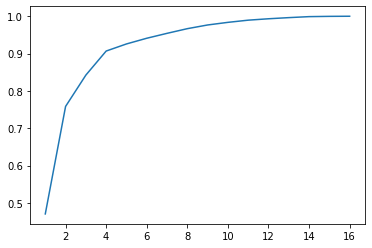

In [40]:
plt.plot(range(1,17),np.cumsum(pipeline_4.named_steps['PCA'].explained_variance_ratio_))


In [41]:
#Therefore we choose 4 as the PCA components

In [153]:
pipeline_5=Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=4))])
cust_level_full_df_pca=pipeline_5.fit_transform(cust_level_full_df)

In [154]:
cust_level_full_df_pca

array([[-1.35097547,  0.06115581,  0.32562123, -0.79533278],
       [-0.92082862, -1.45452309, -0.9186686 , -1.17670627],
       [-0.35759787, -1.55952722,  0.45683136, -0.93415808],
       ...,
       [ 0.8119827 ,  2.90990213, -1.96818509,  0.08730889],
       [ 4.56526647,  2.76446981,  0.93698936,  1.42004752],
       [ 2.8263182 , -1.04444462,  0.83040723,  0.62651315]])

([<matplotlib.axis.XTick at 0x1c9549af4c8>,
 <a list of 10 Text xticklabel objects>)

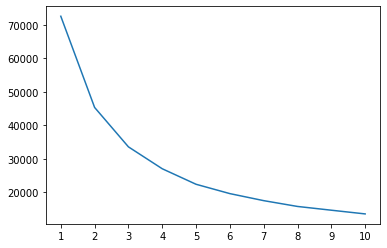

In [46]:
inertia_3=[]
for n in range(1,11):
    kmeans_model_3=KMeans(n_clusters=n)
    kmeans_model_3.fit(cust_level_full_df_pca)
    inertia_3.append(kmeans_model_3.inertia_)
plt.plot(range(1,11),inertia_3)
plt.xticks(range(1,11))

([<matplotlib.axis.XTick at 0x1c95526f2c8>,
 <a list of 9 Text xticklabel objects>)

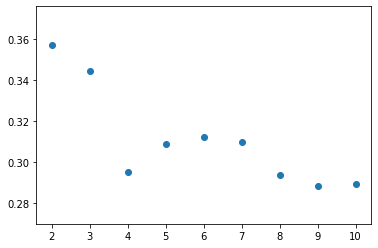

In [47]:
sil_3=[]
for n in range(2,11):
    kmeans_model_3=KMeans(n_clusters=n)
    kmeans_model_3.fit(cust_level_full_df_pca)
    sil_3.append(silhouette_score(cust_level_full_df_pca,kmeans_model_3.labels_,metric='euclidean'))
plt.scatter(range(2,11),sil_3)
plt.xticks(range(2,11))

In [48]:
pipeline_6=Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=2))])
cust_level_full_df_2d=pipeline_6.fit_transform(cust_level_full_df)

In [50]:
kmeans_model_3=KMeans(n_clusters=2)
kmeans_model_3.fit(cust_level_full_df_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

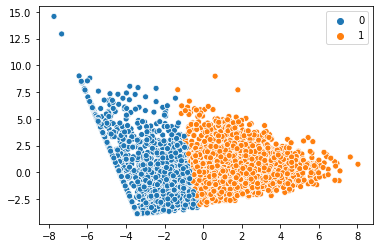

In [51]:
sns.scatterplot(cust_level_full_df_2d[:,0],cust_level_full_df_2d[:,1],hue=kmeans_model_3.labels_)

In [52]:
cust_level_full_df_labeled=cust_level_full_df.copy()
cust_level_full_df_labeled['kmeans']=kmeans_model_3.labels_

In [54]:
cust_level_full_df_labeled.groupby('kmeans').median()

,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,store_id,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
kmeans,,,,,,,,,,,,,,,,
0,5.738173,6.000000,2.428571,3.846154,4.666667,5.125000,1,3,3,2,2,2,1,2,1,1
1,176.658509,5.597938,2.297872,3.541353,4.481928,5.119205,4,64,88,13,3,4,3,4,2,4


In [55]:
#Hieracrchical Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

([<matplotlib.axis.XTick at 0x1c9568dcec8>,
 <a list of 9 Text xticklabel objects>)

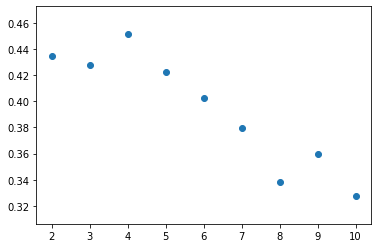

In [155]:
sil_4=[]
for n in range(2,11):
    hi_model_1=AgglomerativeClustering(n_clusters=n,affinity='cosine',linkage='average')
    hi_model_1.fit(cust_level_full_df_pca)
    sil_4.append(silhouette_score(cust_level_full_df_pca,hi_model_1.labels_,metric='cosine'))
plt.scatter(range(2,11),sil_4)
plt.xticks(range(2,11))

In [156]:
hi_model_1=AgglomerativeClustering(n_clusters=2,affinity='cosine',linkage='average')
hi_model_1.fit(cust_level_full_df_pca)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [157]:
np.unique(hi_model_1.labels_,return_counts=True)

(array([0, 1], dtype=int64), array([2195, 2805], dtype=int64))

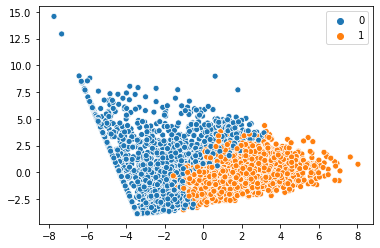

In [158]:
sns.scatterplot(cust_level_full_df_2d[:,0],cust_level_full_df_2d[:,1],hue=hi_model_1.labels_)

In [159]:
cust_level_full_df_labeled['hi_model_cosine']=hi_model_1.labels_

In [160]:
cust_level_full_df_labeled.groupby('hi_model_cosine').describe()

spend                                               \
                  count        mean         std       min        25%   
hi_model_cosine                                                        
0                2195.0   45.064100   81.432299  0.010000   2.296039   
1                2805.0  238.293798  231.108025  4.170143  75.830461   

                                                     prod_id            \
                        50%         75%          max   count      mean   
hi_model_cosine                                                          
0                  8.705000   42.949729   745.831312  2195.0  9.178247   
1                171.063783  326.325250  2416.074380  2805.0  5.348078   

                                                                          \
                      std  min       25%       50%        75%        max   
hi_model_cosine                                                            
0                6.707890  1.0  3.333333  8.500000  13.000000  54.000000   
1                2.526365  1.0  3.338164  4.916667   6.930836  18.643478   

                prod_code_40                                               \
                       count      mean       std  min       25%       50%   
hi_model_cosine                                                             
0                     2195.0  2.707534  1.002712  1.0  2.000000  2.885714   
1                     2805.0  2.187261  0.459909  1.0  1.839286  2.181818   

                                    prod_code_30                           \
                      75%       max        count      mean       std  min   
hi_model_cosine                                                             
0                3.334430  6.000000       2195.0  4.893060  2.664759  1.0   
1                2.506329  3.757282       2805.0  3.348289  1.143840  1.0   

                                                         prod_code_20  \
                      25%       50%       75%        max        count   
hi_model_cosine                                                         
0                2.500000  5.000000  6.703965  17.000000       2195.0   
1                2.452055  3.226601  4.108696   7.738318       2805.0   

                                                                             \
                     mean       std  min       25%  50%       75%       max   
hi_model_cosine                                                               
0                6.694561  4.244084  1.0  3.000000  6.5  9.346688  31.00000   
1                4.235094  1.731615  1.0  2.859788  4.0  5.339130  11.17757   

                prod_code_10                                               \
                       count      mean       std  min       25%       50%   
hi_model_cosine                                                             
0                     2195.0  8.146183  5.663441  1.0  3.000000  7.666667   
1                     2805.0  4.883094  2.223459  1.0  3.133333  4.500000   

                                   store_id                                \
                    75%        max    count      mean       std  min  25%   
hi_model_cosine                                                             
0                11.500  44.000000   2195.0  1.954897  1.517527  1.0  1.0   
1                 6.275  15.843478   2805.0  5.095900  3.647210  1.0  3.0   

                                shop_week                                   \
                 50%  75%   max     count       mean        std  min   25%   
hi_model_cosine                                                              
0                1.0  2.0  11.0    2195.0  17.451481  27.957266  1.0   1.0   
1                4.0  7.0  41.0    2805.0  61.710873  34.575098  3.0  30.0   

                                   shop_date                              \
                  50%   75%    max     count        mean        std  min   
hi_model_cosine                                         

In [104]:
cust_level_full_df_labeled=cust_level_full_df_labeled.merge(cust_df,on='cust_id')
cust_level_full_df_labeled['cust_lifestage'].fillna('XX',inplace=True)
cust_level_full_df_labeled.head()

,cust_id,spend,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,store_id,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,kmeans,hi_model_cosine,cust_price_sensitivity,cust_lifestage
0,CUST0000000013,20.445778,7.750000,2.500000,4.333333,6.250000,7.000000,2,12,12,6,3,2,3,2,2,2,0,0,MM,YF
1,CUST0000000055,78.369838,4.666667,2.133333,2.733333,3.600000,3.733333,1,15,15,6,3,3,2,4,1,1,0,1,LA,YA
2,CUST0000000679,21.352000,4.000000,2.142857,2.642857,3.142857,3.571429,3,12,14,5,3,3,2,4,2,3,1,1,MM,OT
3,CUST0000001052,90.945833,2.645161,1.870968,2.225806,2.354839,2.483871,3,28,31,7,3,3,2,3,3,2,1,1,UM,PE
4,CUST0000001058,3.972222,18.000000,4.000000,8.000000,13.000000,14.000000,1,2,2,1,1,1,1,1,1,1,0,0,UM,OT


In [106]:
cust_level_full_df_labeled[cust_level_full_df_labeled['hi_model_cosine']==0]['cust_price_sensitivity'].value_counts(normalize=True)

MM    0.297494
XX    0.286560
UM    0.208656
LA    0.207289
Name: cust_price_sensitivity, dtype: float64

In [107]:
cust_level_full_df_labeled[cust_level_full_df_labeled['hi_model_cosine']==1]['cust_price_sensitivity'].value_counts(normalize=True)

MM    0.435294
UM    0.300535
LA    0.260250
XX    0.003922
Name: cust_price_sensitivity, dtype: float64

In [108]:
cust_level_full_df_labeled[cust_level_full_df_labeled['hi_model_cosine']==0]['cust_lifestage'].value_counts(normalize=True)

OT    0.618679
XX    0.082460
YF    0.082460
YA    0.077904
OA    0.063326
PE    0.051936
OF    0.023235
Name: cust_lifestage, dtype: float64

In [109]:
cust_level_full_df_labeled[cust_level_full_df_labeled['hi_model_cosine']==1]['cust_lifestage'].value_counts(normalize=True)

OT    0.331551
YA    0.162567
YF    0.132264
OA    0.129768
XX    0.121212
PE    0.081996
OF    0.040642
Name: cust_lifestage, dtype: float64

In [110]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_full_df_labeled[(cust_level_full_df_labeled['hi_model_cosine']==0) &
                      (cust_level_full_df_labeled['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_full_df_labeled[(cust_level_full_df_labeled['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.3520368946963874
LA,0.38396624472573837
MM,0.34845250800426897
XX,0.9828125


In [111]:
for item in ['OT', 'OA', 'YF', 'YA', 'PE', 'OF','XX']:
    fraction=cust_level_full_df_labeled[(cust_level_full_df_labeled['hi_model_cosine']==0) &
                      (cust_level_full_df_labeled['cust_lifestage']==item)]['cust_lifestage'].count()/\
    cust_level_full_df_labeled[(cust_level_full_df_labeled['cust_lifestage']==item)]['cust_lifestage'].count()
    print('{},{}'.format(item,fraction))

OT,0.5935314685314685
OA,0.27634194831013914
YF,0.3278985507246377
YA,0.2727272727272727
PE,0.3313953488372093
OF,0.3090909090909091
XX,0.3474088291746641


In [161]:
# Another Trial on aggregation

In [162]:
cust_level_df_1=grocery_df.groupby(['cust_id','basket_id']).agg({'spend':'sum'}).groupby(level=0).agg({'spend':'mean'})
cust_level_df_1.head()

,spend
cust_id,
CUST0000000013,13.360000
CUST0000000055,28.910000
CUST0000000679,6.116429
CUST0000001052,8.416774
CUST0000001058,35.750000


In [164]:
cust_level_add_var_df_1=grocery_df.groupby('cust_id')[['store_id','prod_id','prod_code_40','prod_code_30','prod_code_20'
                                                       ,'prod_code_10','shop_week','shop_date','shop_hour',
                                                     'basket_size','basket_price_sensitivity','basket_type'
                                                     ,'basket_dominant_mission','store_format','store_region']].nunique()
cust_level_add_var_df_1.head()

,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
cust_id,,,,,,,,,,,,,,,
CUST0000000013,2,79,5,16,33,53,12,12,6,3,2,3,2,2,2
CUST0000000055,1,41,5,12,25,32,15,15,6,3,3,2,4,1,1
CUST0000000679,3,36,6,10,17,26,12,14,5,3,3,2,4,2,3
CUST0000001052,3,42,6,13,21,26,28,31,7,3,3,2,3,3,2
CUST0000001058,1,18,4,8,13,14,2,2,1,1,1,1,1,1,1


In [165]:
cust_level_full_df_1=cust_level_df_1.merge(cust_level_add_var_df_1,left_index=True,right_index=True)
cust_level_full_df_1.head()

,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
cust_id,,,,,,,,,,,,,,,,
CUST0000000013,13.360000,2,79,5,16,33,53,12,12,6,3,2,3,2,2,2
CUST0000000055,28.910000,1,41,5,12,25,32,15,15,6,3,3,2,4,1,1
CUST0000000679,6.116429,3,36,6,10,17,26,12,14,5,3,3,2,4,2,3
CUST0000001052,8.416774,3,42,6,13,21,26,28,31,7,3,3,2,3,3,2
CUST0000001058,35.750000,1,18,4,8,13,14,2,2,1,1,1,1,1,1,1


In [166]:
pipeline_7=Pipeline([('scaler',StandardScaler()),('PCA',PCA())])
pipeline_7.fit(cust_level_full_df_1)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('PCA',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

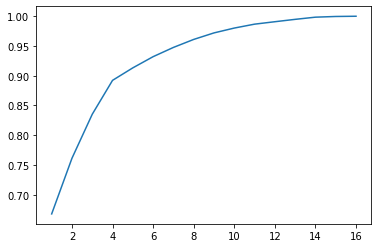

In [167]:
plt.plot(range(1,17),np.cumsum(pipeline_7.named_steps['PCA'].explained_variance_ratio_))


In [168]:
pipeline_8=Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=4))])
cust_level_full_df_pca_1=pipeline_8.fit_transform(cust_level_full_df_1)

In [169]:
cust_level_full_df_pca_1

array([[-1.09747796,  0.08846886, -0.15709319,  0.80996905],
       [-1.55947834,  0.85409812, -0.70031563,  1.34355599],
       [-1.17216124, -0.98680194, -0.82051028,  0.94678962],
       ...,
       [ 3.12904514,  2.77465412, -0.1280715 , -0.98047302],
       [ 5.08818292, -1.37882335,  0.90558628, -1.09572497],
       [ 2.98985433, -1.09092096,  0.31085251, -0.24493055]])

([<matplotlib.axis.XTick at 0x1c956a8e948>,
 <a list of 9 Text xticklabel objects>)

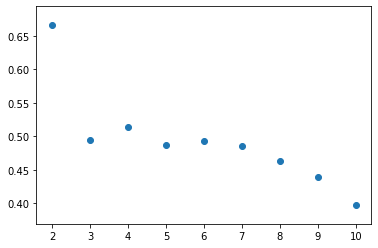

In [170]:
sil_5=[]
for n in range(2,11):
    hi_model_2=AgglomerativeClustering(n_clusters=n,affinity='cosine',linkage='average')
    hi_model_2.fit(cust_level_full_df_pca_1)
    sil_5.append(silhouette_score(cust_level_full_df_pca_1,hi_model_2.labels_,metric='cosine'))
plt.scatter(range(2,11),sil_5)
plt.xticks(range(2,11))

In [172]:
hi_model_2=AgglomerativeClustering(n_clusters=2,affinity='cosine',linkage='average')
hi_model_2.fit(cust_level_full_df_pca_1)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [173]:
np.unique(hi_model_2.labels_,return_counts=True)

(array([0, 1], dtype=int64), array([2038, 2962], dtype=int64))

In [174]:
pipeline_9=Pipeline([('scaler',StandardScaler()),('PCA',PCA(n_components=2))])
cust_level_full_df_2d_1=pipeline_9.fit_transform(cust_level_full_df_1)

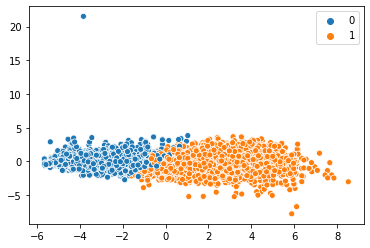

In [175]:
sns.scatterplot(cust_level_full_df_2d_1[:,0],cust_level_full_df_2d_1[:,1],hue=hi_model_2.labels_)

In [177]:
cust_level_full_df_labeled_1=cust_level_full_df_1.copy()
cust_level_full_df_labeled_1['hi_model_cosine']=hi_model_2.labels_
cust_level_full_df_labeled_1.head()

,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,hi_model_cosine
cust_id,,,,,,,,,,,,,,,,,
CUST0000000013,13.360000,2,79,5,16,33,53,12,12,6,3,2,3,2,2,2,0
CUST0000000055,28.910000,1,41,5,12,25,32,15,15,6,3,3,2,4,1,1,0
CUST0000000679,6.116429,3,36,6,10,17,26,12,14,5,3,3,2,4,2,3,0
CUST0000001052,8.416774,3,42,6,13,21,26,28,31,7,3,3,2,3,3,2,1
CUST0000001058,35.750000,1,18,4,8,13,14,2,2,1,1,1,1,1,1,1,0


In [178]:
cust_level_full_df_labeled_1=cust_level_full_df_labeled_1.merge(cust_df,on='cust_id')
cust_level_full_df_labeled_1['cust_lifestage'].fillna('XX',inplace=True)
cust_level_full_df_labeled_1.head()

,cust_id,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,hi_model_cosine,cust_price_sensitivity,cust_lifestage
0,CUST0000000013,13.360000,2,79,5,16,33,53,12,12,6,3,2,3,2,2,2,0,MM,YF
1,CUST0000000055,28.910000,1,41,5,12,25,32,15,15,6,3,3,2,4,1,1,0,LA,YA
2,CUST0000000679,6.116429,3,36,6,10,17,26,12,14,5,3,3,2,4,2,3,0,MM,OT
3,CUST0000001052,8.416774,3,42,6,13,21,26,28,31,7,3,3,2,3,3,2,1,UM,PE
4,CUST0000001058,35.750000,1,18,4,8,13,14,2,2,1,1,1,1,1,1,1,0,UM,OT


In [179]:
cust_level_full_df_labeled_1.groupby('hi_model_cosine').describe()

spend                                                      \
                  count       mean       std       min       25%        50%   
hi_model_cosine                                                               
0                2038.0  15.436999  24.15675  0.010000  4.285833   9.156667   
1                2962.0  13.221033   8.89690  1.233158  6.852615  11.157807   

                                       store_id                                \
                       75%         max    count      mean       std  min  25%   
hi_model_cosine                                                                 
0                20.197402  822.090000   2038.0  1.540726  0.870089  1.0  1.0   
1                17.343281   96.605658   2962.0  5.214382  3.518891  1.0  3.0   

                                prod_id                                       \
                 50%  75%   max   count        mean         std   min    25%   
hi_model_cosine                                                                
0                1.0  2.0   6.0  2038.0   30.681551   40.913479   1.0    6.0   
1                4.0  7.0  41.0  2962.0  258.332208  168.538046  14.0  126.0   

                                      prod_code_40                           \
                   50%    75%     max        count      mean       std  min   
hi_model_cosine                                                               
0                 17.0   39.0   418.0       2038.0  3.712954  1.447337  1.0   
1                222.0  355.0  1053.0       2962.0  6.117826  0.926163  3.0   

                                    prod_code_30                            \
                 25%  50%  75%  max        count       mean       std  min   
hi_model_cosine                                                              
0                3.0  4.0  5.0  7.0       2038.0   8.550049  5.080520  1.0   
1                6.0  6.0  7.0  9.0       2962.0  20.264686  3.423723  6.0   

                                        prod_code_20                        \
                  25%   50%   75%   max        count       mean        std   
hi_model_cosine                                                              
0                 4.0   8.0  13.0  25.0       2038.0  13.911678  10.503386   
1                18.0  21.0  23.0  28.0       2962.0  44.972316  11.420248   

                                              prod_code_10             \
                  min   25%   50%   75%   max        count       mean   
hi_model_cosine                                                         
0                 1.0   5.0  11.0  21.0  57.0       2038.0  20.467615   
1                10.0  37.0  46.0  54.0  70.0       2962.0  94.009791   

                                                           shop_week  \
                       std   min   25%   50%    75%    max     count   
hi_model_cosine                                                        
0                19.488317   1.0   6.0  14.0   30.0  130.0    2038.0   
1                34.452385  11.0  68.0  95.0  121.0  180.0    2962.0   

                                                                    shop_date  \
                      mean        std  min   25%   50%   75%    max     count   
hi_model_cosine                                                                 
0                 8.158489  13.620637  1.0   1.0   3.0   9.0  115.0    2038.0   
1                65.758947  32.332952  4.0  37.0  66.0  96.0  117.0    2962.0   

                                                                       \
                       mean        std  min   25%   50%    75%    max   
hi_model_cosine                                                         
0                  9.794406  19.204106  1.0   1.0   4.0   11.0  315.0   
1                110.737677  83.992612  7.0  47.0  90.0  151.0  545.0   

                shop_hour                                                    \
                    count       mean       std  min   25%  

In [188]:
cust_level_full_df_labeled_1.groupby('hi_model_cosine').median()

,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region
hi_model_cosine,,,,,,,,,,,,,,,,
0,9.156667,1,17,4,8,11,14,3,4,3,2,2,1,2,1,1
1,11.157807,4,222,6,21,46,95,66,90,13,3,4,3,4,2,4


In [180]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine']==0]['cust_price_sensitivity'].value_counts(normalize=True)

XX    0.313543
MM    0.270363
UM    0.210010
LA    0.206084
Name: cust_price_sensitivity, dtype: float64

In [181]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine']==1]['cust_price_sensitivity'].value_counts(normalize=True)

MM    0.446658
UM    0.294733
LA    0.258271
XX    0.000338
Name: cust_price_sensitivity, dtype: float64

In [182]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine']==0) &
                      (cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.32897770945426597
LA,0.35443037974683544
MM,0.29402347918890076
XX,0.9984375


In [183]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine']==1) &
                      (cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.671022290545734
LA,0.6455696202531646
MM,0.7059765208110993
XX,0.0015625


In [186]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine']==0]['cust_lifestage'].value_counts(normalize=True)

OT    0.661923
YA    0.078508
XX    0.071639
OA    0.064769
PE    0.062316
YF    0.044161
OF    0.016683
Name: cust_lifestage, dtype: float64

In [187]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine']==1]['cust_lifestage'].value_counts(normalize=True)

OT    0.317016
YA    0.157664
YF    0.155976
XX    0.126604
OA    0.125253
PE    0.073261
OF    0.044227
Name: cust_lifestage, dtype: float64

In [184]:
for item in ['OT', 'OA', 'YF', 'YA', 'PE', 'OF','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine']==0) &
                      (cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()
    print('{},{}'.format(item,fraction))

OT,0.5895979020979021
OA,0.2624254473161034
YF,0.16304347826086957
YA,0.2551834130781499
PE,0.3691860465116279
OF,0.20606060606060606
XX,0.2802303262955854


In [185]:
for item in ['OT', 'OA', 'YF', 'YA', 'PE', 'OF','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine']==1) &
                      (cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()
    print('{},{}'.format(item,fraction))

OT,0.4104020979020979
OA,0.7375745526838966
YF,0.8369565217391305
YA,0.74481658692185
PE,0.6308139534883721
OF,0.793939393939394
XX,0.7197696737044146


In [189]:
# Kmeans on final dataset

([<matplotlib.axis.XTick at 0x1c956bf2548>,
 <a list of 10 Text xticklabel objects>)

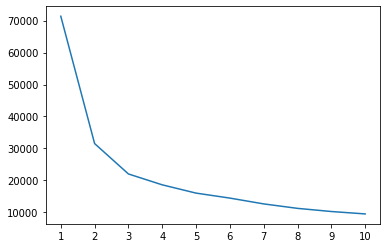

In [190]:
inertia_5=[]
for n in range(1,11):
    kmeans_model_4=KMeans(n_clusters=n)
    kmeans_model_4.fit(cust_level_full_df_pca_1)
    inertia_5.append(kmeans_model_4.inertia_)
plt.plot(range(1,11),inertia_5)
plt.xticks(range(1,11))

([<matplotlib.axis.XTick at 0x1c956ccb548>,
 <a list of 9 Text xticklabel objects>)

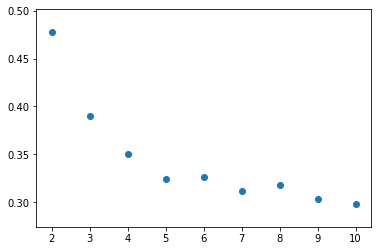

In [191]:
sil_6=[]
for n in range(2,11):
    kmeans_model_4=KMeans(n_clusters=n)
    kmeans_model_4.fit(cust_level_full_df_pca_1)
    sil_6.append(silhouette_score(cust_level_full_df_pca_1,kmeans_model_4.labels_,metric='euclidean'))
plt.scatter(range(2,11),sil_6)
plt.xticks(range(2,11))

In [192]:
kmeans_model_4=KMeans(n_clusters=2)
kmeans_model_4.fit(cust_level_full_df_pca_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

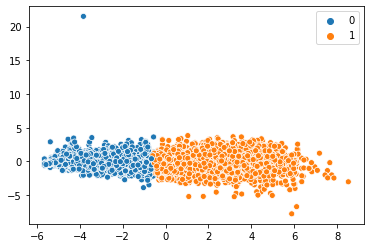

In [193]:
sns.scatterplot(cust_level_full_df_2d_1[:,0],cust_level_full_df_2d_1[:,1],hue=kmeans_model_4.labels_)

In [194]:
np.unique(kmeans_model_4.labels_,return_counts=True)

(array([0, 1]), array([2019, 2981], dtype=int64))

In [195]:
cust_level_full_df_labeled_1['kmeans']=kmeans_model_4.labels_
cust_level_full_df_labeled_1.head()

,cust_id,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,hi_model_cosine,cust_price_sensitivity,cust_lifestage,kmeans
0,CUST0000000013,13.360000,2,79,5,16,33,53,12,12,6,3,2,3,2,2,2,0,MM,YF,0
1,CUST0000000055,28.910000,1,41,5,12,25,32,15,15,6,3,3,2,4,1,1,0,LA,YA,0
2,CUST0000000679,6.116429,3,36,6,10,17,26,12,14,5,3,3,2,4,2,3,0,MM,OT,0
3,CUST0000001052,8.416774,3,42,6,13,21,26,28,31,7,3,3,2,3,3,2,1,UM,PE,0
4,CUST0000001058,35.750000,1,18,4,8,13,14,2,2,1,1,1,1,1,1,1,0,UM,OT,0


In [196]:
cust_level_full_df_labeled_1.groupby('kmeans').describe()

spend                                                       \
         count       mean        std       min       25%        50%   
kmeans                                                                
0       2019.0  14.860088  23.983216  0.010000  4.207917   8.621429   
1       2981.0  13.625892   9.455265  1.504459  6.975370  11.336667   

                              store_id                                     \
              75%         max    count      mean       std  min  25%  50%   
kmeans                                                                      
0       19.248500  822.090000   2019.0  1.596830  1.017152  1.0  1.0  1.0   
1       17.621548   96.605658   2981.0  5.152969  3.532697  1.0  3.0  4.0   

                  prod_id                                                     \
        75%   max   count        mean         std   min    25%    50%    75%   
kmeans                                                                         
0       2.0   9.0  2019.0   26.156018   29.259170   1.0    6.0   17.0   36.0   
1       7.0  41.0  2981.0  259.946327  166.452341  20.0  129.0  222.0  354.0   

               prod_code_40                                               \
           max        count      mean       std  min  25%  50%  75%  max   
kmeans                                                                     
0        276.0       2019.0  3.678058  1.419938  1.0  3.0  4.0  5.0  7.0   
1       1053.0       2981.0  6.126132  0.917133  4.0  6.0  6.0  7.0  9.0   

       prod_code_30                                                     \
              count       mean       std   min   25%   50%   75%   max   
kmeans                                                                   
0            2019.0   8.284794  4.786070   1.0   4.0   8.0  12.0  21.0   
1            2981.0  20.369675  3.222541  10.0  18.0  21.0  23.0  28.0   

       prod_code_20                                                      \
              count       mean        std   min   25%   50%   75%   max   
kmeans                                                                    
0            2019.0  13.165924   9.466320   1.0   5.0  11.0  20.0  48.0   
1            2981.0  45.279436  10.890859  13.0  37.0  46.0  54.0  70.0   

       prod_code_10                                                        \
              count       mean        std   min   25%   50%    75%    max   
kmeans                                                                      
0            2019.0  18.734522  16.430647   1.0   6.0  14.0   28.0  101.0   
1            2981.0  94.714861  33.398186  15.0  69.0  95.0  121.0  180.0   

       shop_week                                                      \
           count       mean        std  min   25%   50%   75%    max   
kmeans                                                                 
0         2019.0   6.757801   9.416541  1.0   1.0   3.0   9.0  108.0   
1         2981.0  66.340490  31.869803  5.0  38.0  67.0  96.0  117.0   

       shop_date                                                        \
           count        mean        std  min   25%   50%    75%    max   
kmeans                                                                   
0         2019.0    7.879148  11.363847  1.0   1.0   3.0   10.0  111.0   
1         2981.0  111.391479  83.513508  8.0  48.0  91.0  151.0  545.0   

       shop_hour                                                    \
           count       mean       std  min   25%   50%   75%   max   
kmeans                                                               
0         2019.0   3.780584  3.089337  1.0   1.0   3.0   6.0  14.0   
1         2981.0  12.262999  1.989723  4.0  11.0  13.0  14.0  15.0   

       basket_size                                               \
             count      mean       std  min  25%  50%  75%  max   
kmeans                                                            
0           2019.0  1.751857  0.796636  1.0  1.0  2.0  2.0  3.0   
1

In [197]:
# This time without PCA and hierarchical

In [198]:
cust_level_full_df_1_scale=StandardScaler().fit_transform(cust_level_full_df_1)

([<matplotlib.axis.XTick at 0x1c957ae80c8>,
 <a list of 9 Text xticklabel objects>)

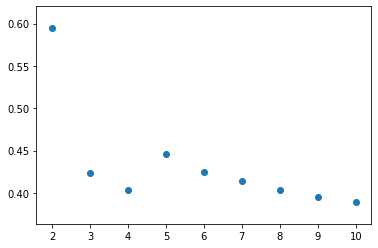

In [202]:
sil_7=[]
for n in range(2,11):
    hi_model_3=AgglomerativeClustering(n_clusters=n,affinity='cosine',linkage='average')
    hi_model_3.fit(cust_level_full_df_1_scale)
    sil_7.append(silhouette_score(cust_level_full_df_1_scale,hi_model_3.labels_,metric='cosine'))
plt.scatter(range(2,11),sil_7)
plt.xticks(range(2,11))

In [203]:
hi_model_3=AgglomerativeClustering(n_clusters=2,affinity='cosine',linkage='average')
hi_model_3.fit(cust_level_full_df_1_scale)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

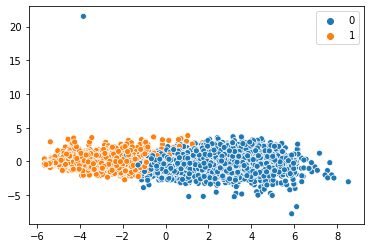

In [204]:
sns.scatterplot(cust_level_full_df_2d_1[:,0],cust_level_full_df_2d_1[:,1],hue=hi_model_3.labels_)

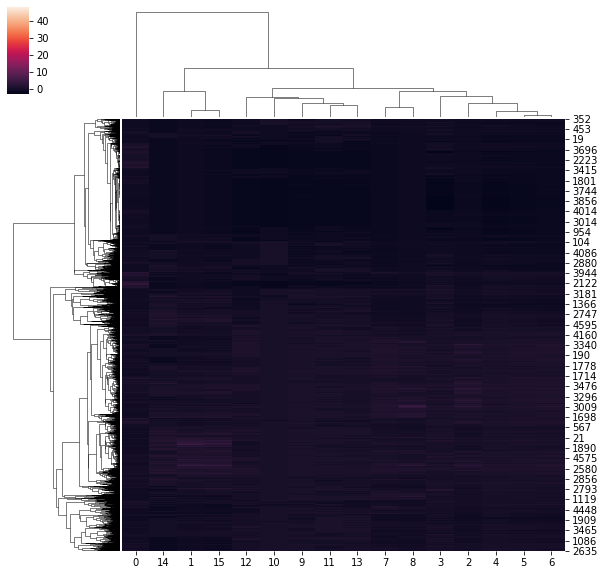

In [205]:
sns.clustermap(cust_level_full_df_1_scale,metric='cosine',method='average')

In [206]:
from scipy.cluster.hierarchy import dendrogram,linkage

Text(0.5, 0, 'data indices')

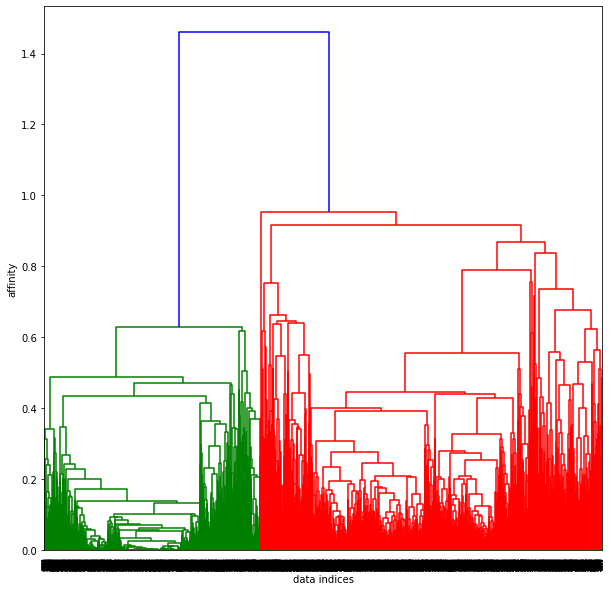

In [207]:
sausage_links=linkage(cust_level_full_df_1_scale,method='average',metric='cosine')
plt.figure(figsize=(10,10))
dendrogram(sausage_links)
plt.ylabel('affinity')
plt.xlabel('data indices')

In [208]:
np.unique(hi_model_3.labels_,return_counts=True)

(array([0, 1], dtype=int64), array([3057, 1943], dtype=int64))

In [209]:
cust_level_full_df_labeled_1['hi_model_cosine_no_pca']=hi_model_3.labels_
cust_level_full_df_labeled_1.head()

,cust_id,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,hi_model_cosine,cust_price_sensitivity,cust_lifestage,kmeans,hi_model_cosine_no_pca
0,CUST0000000013,13.360000,2,79,5,16,33,53,12,12,6,3,2,3,2,2,2,0,MM,YF,0,0
1,CUST0000000055,28.910000,1,41,5,12,25,32,15,15,6,3,3,2,4,1,1,0,LA,YA,0,1
2,CUST0000000679,6.116429,3,36,6,10,17,26,12,14,5,3,3,2,4,2,3,0,MM,OT,0,1
3,CUST0000001052,8.416774,3,42,6,13,21,26,28,31,7,3,3,2,3,3,2,1,UM,PE,0,0
4,CUST0000001058,35.750000,1,18,4,8,13,14,2,2,1,1,1,1,1,1,1,0,UM,OT,0,1


In [210]:
cust_level_full_df_labeled_1.groupby('hi_model_cosine_no_pca').describe()

spend                                            \
                         count       mean        std       min       25%   
hi_model_cosine_no_pca                                                     
0                       3057.0  13.461089  17.100000  1.233158  6.847158   
1                       1943.0  15.167654  16.550172  0.010000  4.207917   

                                                         store_id            \
                              50%        75%         max    count      mean   
hi_model_cosine_no_pca                                                        
0                       11.147021  17.336600  822.090000   3057.0  5.110893   
1                        8.870000  20.466471  131.803333   1943.0  1.523932   

                                                           prod_id  \
                             std  min  25%  50%  75%   max   count   
hi_model_cosine_no_pca                                               
0                       3.512478  1.0  3.0  4.0  7.0  41.0  3057.0   
1                       0.882557  1.0  1.0  1.0  2.0   6.0  1943.0   

                                                                           \
                              mean         std   min    25%    50%    75%   
hi_model_cosine_no_pca                                                      
0                       253.165522  168.488923  14.0  120.0  215.0  350.0   
1                        27.679876   38.847234   1.0    6.0   16.0   35.0   

                               prod_code_40                                \
                           max        count      mean       std  min  25%   
hi_model_cosine_no_pca                                                      
0                       1053.0       3057.0  6.081452  0.945975  3.0  6.0   
1                        418.0       1943.0  3.652599  1.443495  1.0  3.0   

                                      prod_code_30                            \
                        50%  75%  max        count       mean       std  min   
hi_model_cosine_no_pca                                                         
0                       6.0  7.0  9.0       3057.0  20.116454  3.483626  6.0   
1                       4.0  5.0  7.0       1943.0   8.210499  4.945059  1.0   

                                               prod_code_20             \
                         25%   50%   75%   max        count       mean   
hi_model_cosine_no_pca                                                   
0                       18.0  21.0  23.0  28.0       3057.0  44.516192   
1                        4.0   8.0  12.0  25.0       1943.0  13.110654   

                                                               prod_code_10  \
                              std  min   25%   50%   75%   max        count   
hi_model_cosine_no_pca                                                        
0                       11.558063  8.0  36.0  46.0  53.0  70.0       3057.0   
1                       10.039603  1.0   5.0  11.0  19.0  57.0       1943.0   

                                                                              \
                             mean        std   min   25%   50%    75%    max   
hi_model_cosine_no_pca                                                         
0                       92.673863  34.786211  11.0  65.0  94.0  120.0  180.0   
1                       18.973752  18.537290   1.0   6.0  14.0   27.0  130.0   

                       shop_week                                               \
                           count       mean        std  min   25%   50%   75%   
hi_model_cosine_no_pca                                                          
0                         3057.0  64.910697  32.631503  1.0  36.0  65.0  95.0   
1                         1943.0   6.676788  10.056253  1.0   1.0   3.0   8.0   

                              shop_date                                    \
                          max     count        mean        std  min   25%

In [211]:
cust_level_full_df_labeled_1.groupby('hi_model_cosine_no_pca').median()

,spend,store_id,prod_id,prod_code_40,prod_code_30,prod_code_20,prod_code_10,shop_week,shop_date,shop_hour,basket_size,basket_price_sensitivity,basket_type,basket_dominant_mission,store_format,store_region,hi_model_cosine,kmeans
hi_model_cosine_no_pca,,,,,,,,,,,,,,,,,,
0,11.147021,4,215,6,21,46,94,65,88,13,3,4,3,4,2,4,1,1
1,8.870000,1,16,4,8,11,14,3,3,2,2,2,1,2,1,1,0,0


In [212]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==0]['cust_price_sensitivity'].value_counts(normalize=True)

MM    0.442591
UM    0.298332
LA    0.259078
Name: cust_price_sensitivity, dtype: float64

In [213]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==1]['cust_price_sensitivity'].value_counts(normalize=True)

XX    0.329388
MM    0.268142
LA    0.202265
UM    0.200206
Name: cust_price_sensitivity, dtype: float64

In [214]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==0) &
                      (cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.7009992313604919
LA,0.6683544303797468
MM,0.7219850586979722
XX,0.0


In [215]:
for item in ['UM','LA','MM','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==1) &
                      (cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_price_sensitivity']==item)]['cust_price_sensitivity'].count()
    print('{},{}'.format(item,fraction))

UM,0.2990007686395081
LA,0.33164556962025316
MM,0.27801494130202775
XX,1.0


In [216]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==0]['cust_lifestage'].value_counts(normalize=True)

OT    0.317632
YA    0.156690
YF    0.151783
OA    0.127576
XX    0.125940
PE    0.076219
OF    0.044161
Name: cust_lifestage, dtype: float64

In [217]:
cust_level_full_df_labeled_1[cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==1]['cust_lifestage'].value_counts(normalize=True)

OT    0.677818
YA    0.076171
XX    0.069995
OA    0.058157
PE    0.057128
YF    0.045291
OF    0.015440
Name: cust_lifestage, dtype: float64

In [218]:
for item in ['OT', 'OA', 'YF', 'YA', 'PE', 'OF','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==0) &
                      (cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()
    print('{},{}'.format(item,fraction))

OT,0.4243881118881119
OA,0.7753479125248509
YF,0.8405797101449275
YA,0.7639553429027113
PE,0.6773255813953488
OF,0.8181818181818182
XX,0.7389635316698656


In [219]:
for item in ['OT', 'OA', 'YF', 'YA', 'PE', 'OF','XX']:
    fraction=cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['hi_model_cosine_no_pca']==1) &
                      (cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()/\
    cust_level_full_df_labeled_1[(cust_level_full_df_labeled_1['cust_lifestage']==item)]['cust_lifestage'].count()
    print('{},{}'.format(item,fraction))

OT,0.5756118881118881
OA,0.22465208747514911
YF,0.15942028985507245
YA,0.23604465709728867
PE,0.3226744186046512
OF,0.18181818181818182
XX,0.26103646833013433
